# 📈 XGBoost Regression Project

## 📚 Importing Libraries and  Data 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df= sns.load_dataset("diamonds") 

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 📉 Exploratory Data Analysis and Visaulization

In [9]:
price_mean = df['price'].mean()  # mean price of diamonds
print(f"The average price of the diamonds is: ${price_mean:.2f}")

The average price of the diamonds is: $3932.80


In [10]:
price_median = df['price'].median() # median price of diamonds
print(f"The median price of the diamonds is: ${price_median:.2f}")

The median price of the diamonds is: $2401.00


In [11]:
price_var = df['price'].var() # variance of diamond prices
print(f"The variance of the diamond prices is: {price_var:.2f}")


The variance of the diamond prices is: 15915629.42


In [12]:
price_std = df['price'].std() # standard deviation of diamond prices
print(f"The standard deviation of the diamond prices is: {price_std:.2f}")

The standard deviation of the diamond prices is: 3989.44


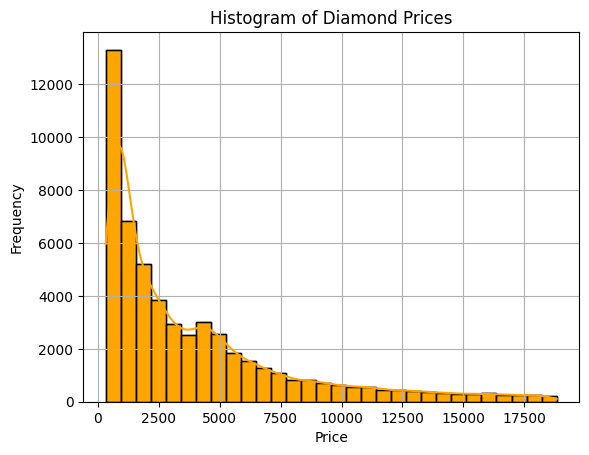

In [13]:
# Univariate Analysis


# Histogram for price  


df['price'].hist(bins=30, edgecolor='black', color='orange')  
plt.title('Histogram of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
sns.histplot(df['price'], kde=True, bins=30, edgecolor='black', color='orange')
plt.show()

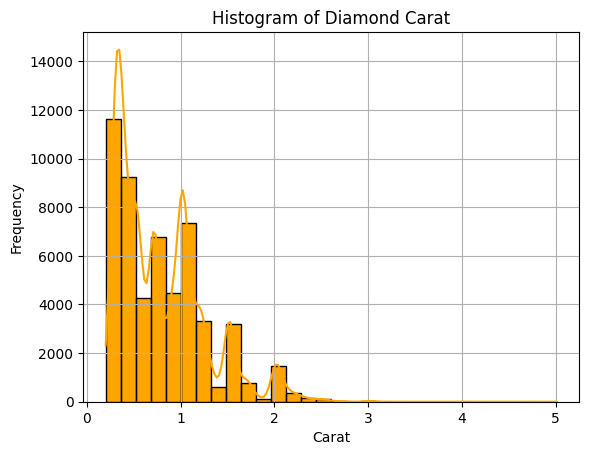

In [14]:
# Histogram for carat

df['carat'].hist(bins=30, color='orange')
plt.title('Histogram of Diamond Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
sns.histplot(df['carat'], kde=True, bins=30, color='orange')

plt.show()

/tmp/ipykernel_6863/2770751087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


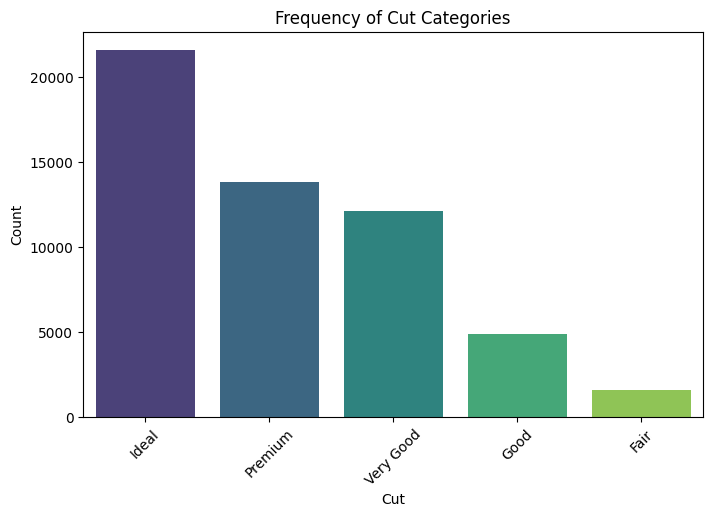

/tmp/ipykernel_6863/2770751087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


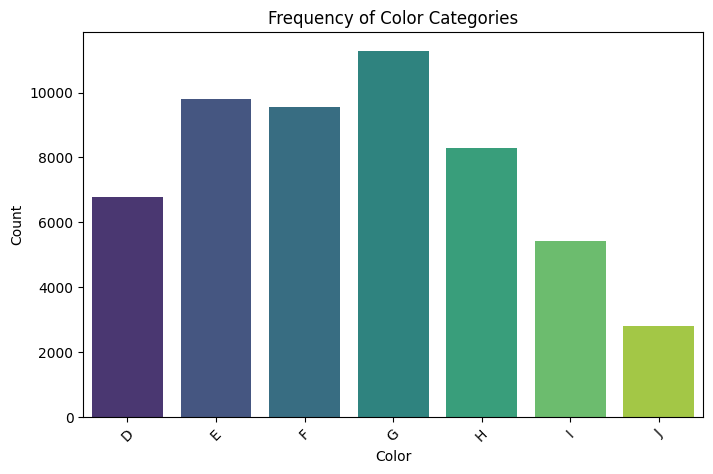

/tmp/ipykernel_6863/2770751087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


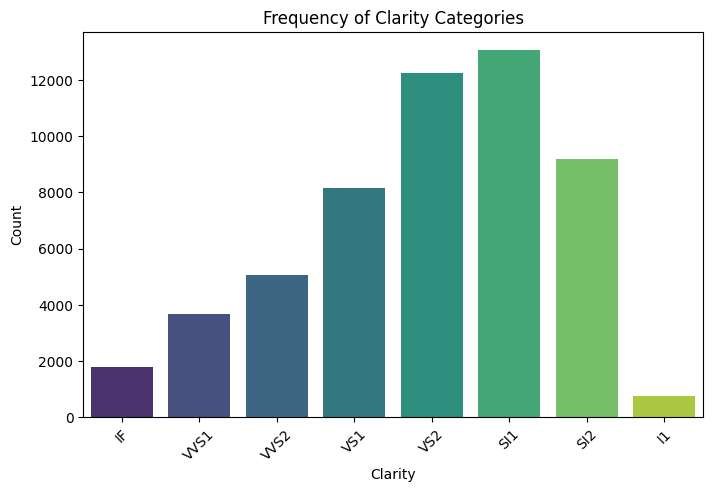

In [15]:
# Count plots for categorical features

categorical_columns = ['cut', 'color', 'clarity']

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Frequency of {column.capitalize()} Categories')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

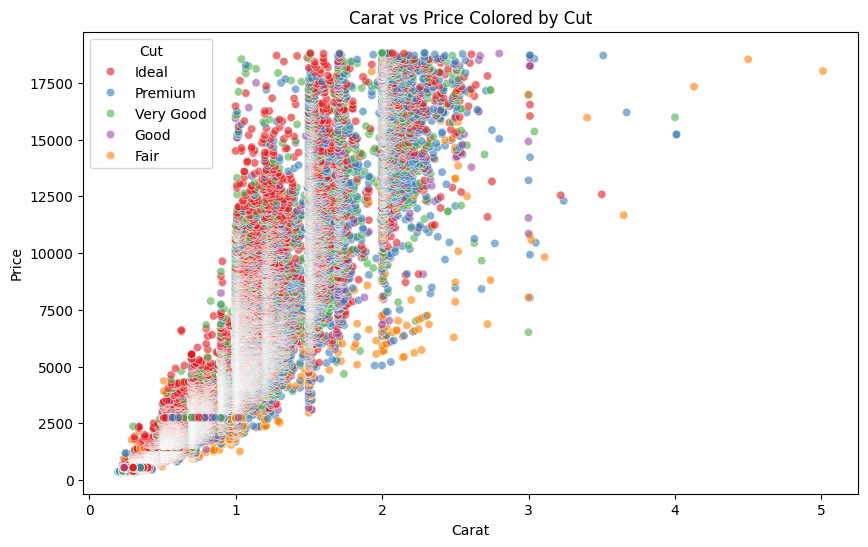

In [16]:
# Bivariate Analysis  

# Scatter plot for carat vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='cut',
                palette='Set1', alpha=0.6)
plt.title('Carat vs Price Colored by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()



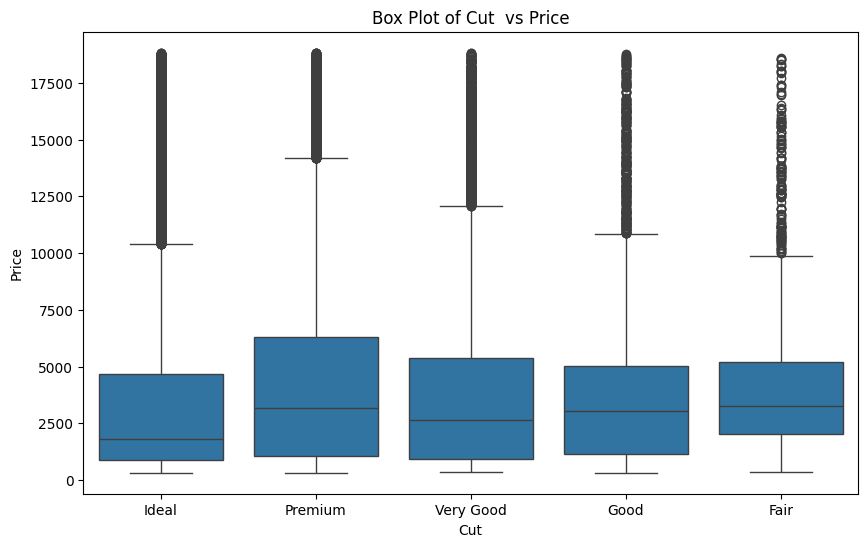

In [17]:
# Boxplot plot for cut  vs price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price')
plt.title('Box Plot of Cut  vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


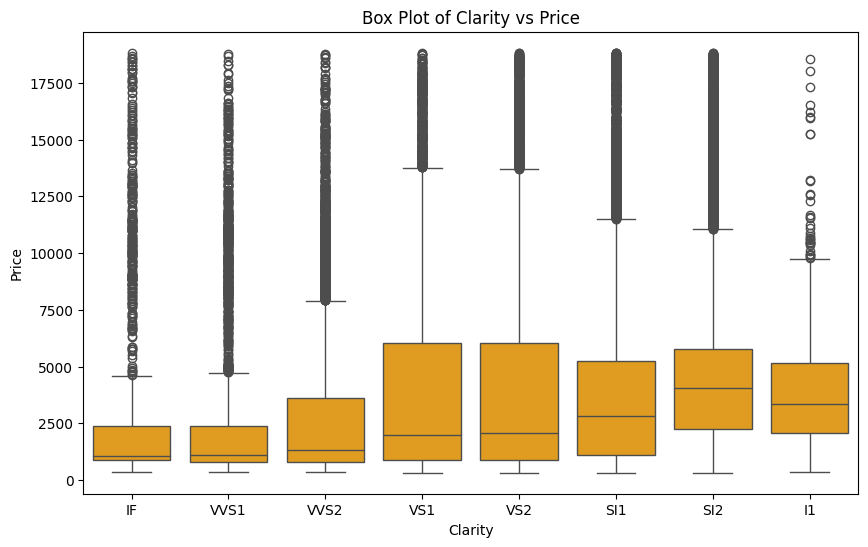

In [18]:
# Boxplot plot for clarity   vs price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clarity', y='price',color='orange')
plt.title('Box Plot of Clarity vs Price')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

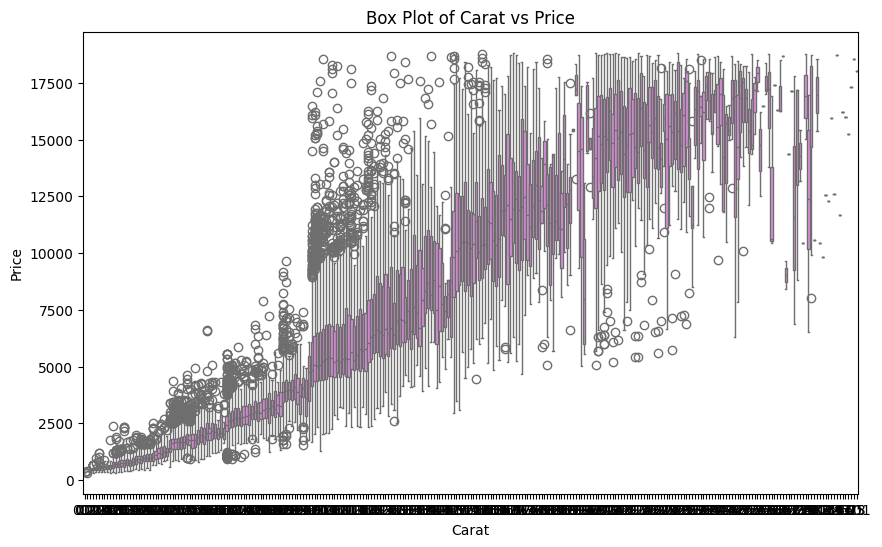

In [19]:
# Boxplot plot for cut  vs price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='carat', y='price',color='violet')
plt.title('Box Plot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [22]:
# Calculate the correlation matrix for numerical columns only
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print(corr_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


In [23]:
cov_matrix=df.select_dtypes(include=['float64', 'int64']).cov()
print(cov_matrix)

             carat      depth        table         price            x  \
carat     0.224687   0.019167     0.192365  1.742765e+03     0.518484   
depth     0.019167   2.052404    -0.946840 -6.085371e+01    -0.040641   
table     0.192365  -0.946840     4.992948  1.133318e+03     0.489643   
price  1742.765364 -60.853712  1133.318064  1.591563e+07  3958.021491   
x         0.518484  -0.040641     0.489643  3.958021e+03     1.258347   
y         0.515248  -0.048009     0.468972  3.943271e+03     1.248789   
z         0.318917   0.095968     0.237996  2.424713e+03     0.768487   

                 y            z  
carat     0.515248     0.318917  
depth    -0.048009     0.095968  
table     0.468972     0.237996  
price  3943.270810  2424.712613  
x         1.248789     0.768487  
y         1.304472     0.767320  
z         0.767320     0.498011  


In [24]:
var_matrix=df.select_dtypes(include=['float64', 'int64']).var()
print(var_matrix)

carat    2.246867e-01
depth    2.052404e+00
table    4.992948e+00
price    1.591563e+07
x        1.258347e+00
y        1.304472e+00
z        4.980109e-01
dtype: float64


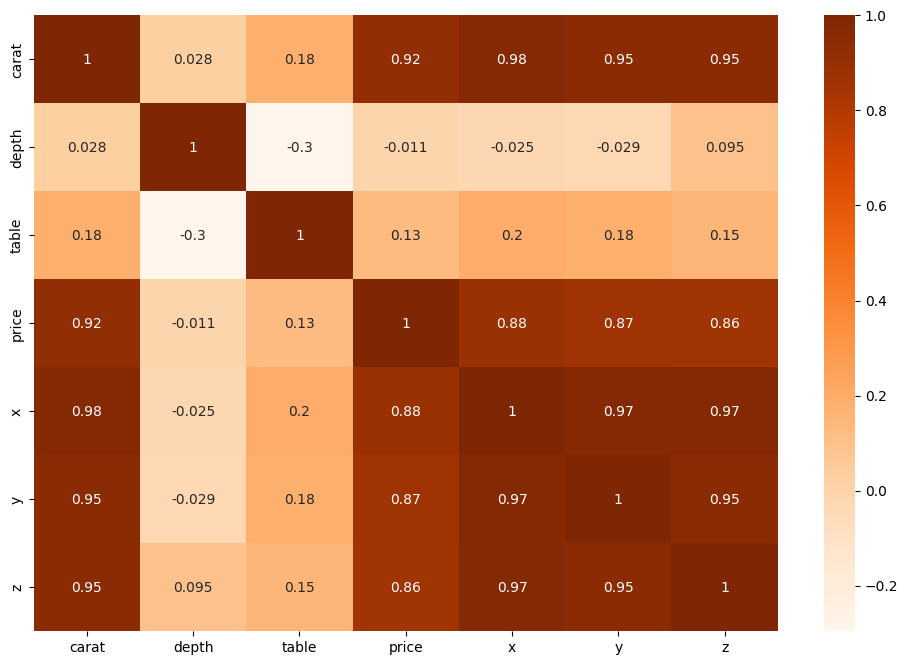

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges')
plt.show()